In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"..\Cases\human-resources-analytics\HR_comma_sep.csv")


In [3]:



ohc = OneHotEncoder(sparse_output=False,drop='first')
ct = make_column_transformer((ohc,
                              make_column_selector(dtype_include=object)), 
                              ('passthrough', 
                               make_column_selector(dtype_include=['int64', 'float64'])), 
                               verbose_feature_names_out=False).set_output(transform='pandas')



In [4]:
X = df.drop('left', axis=1)
X = ct.fit_transform(X)

y = df['left']


In [5]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


kfold = StratifiedKFold(shuffle=True, random_state=24, n_splits=5)

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)


params = {'max_depth': [None, 4,3,2], 
          'min_samples_split': range(2,35,5),
          'min_samples_leaf': range(1,35,5)}

gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')

gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}
-0.12401360741773468


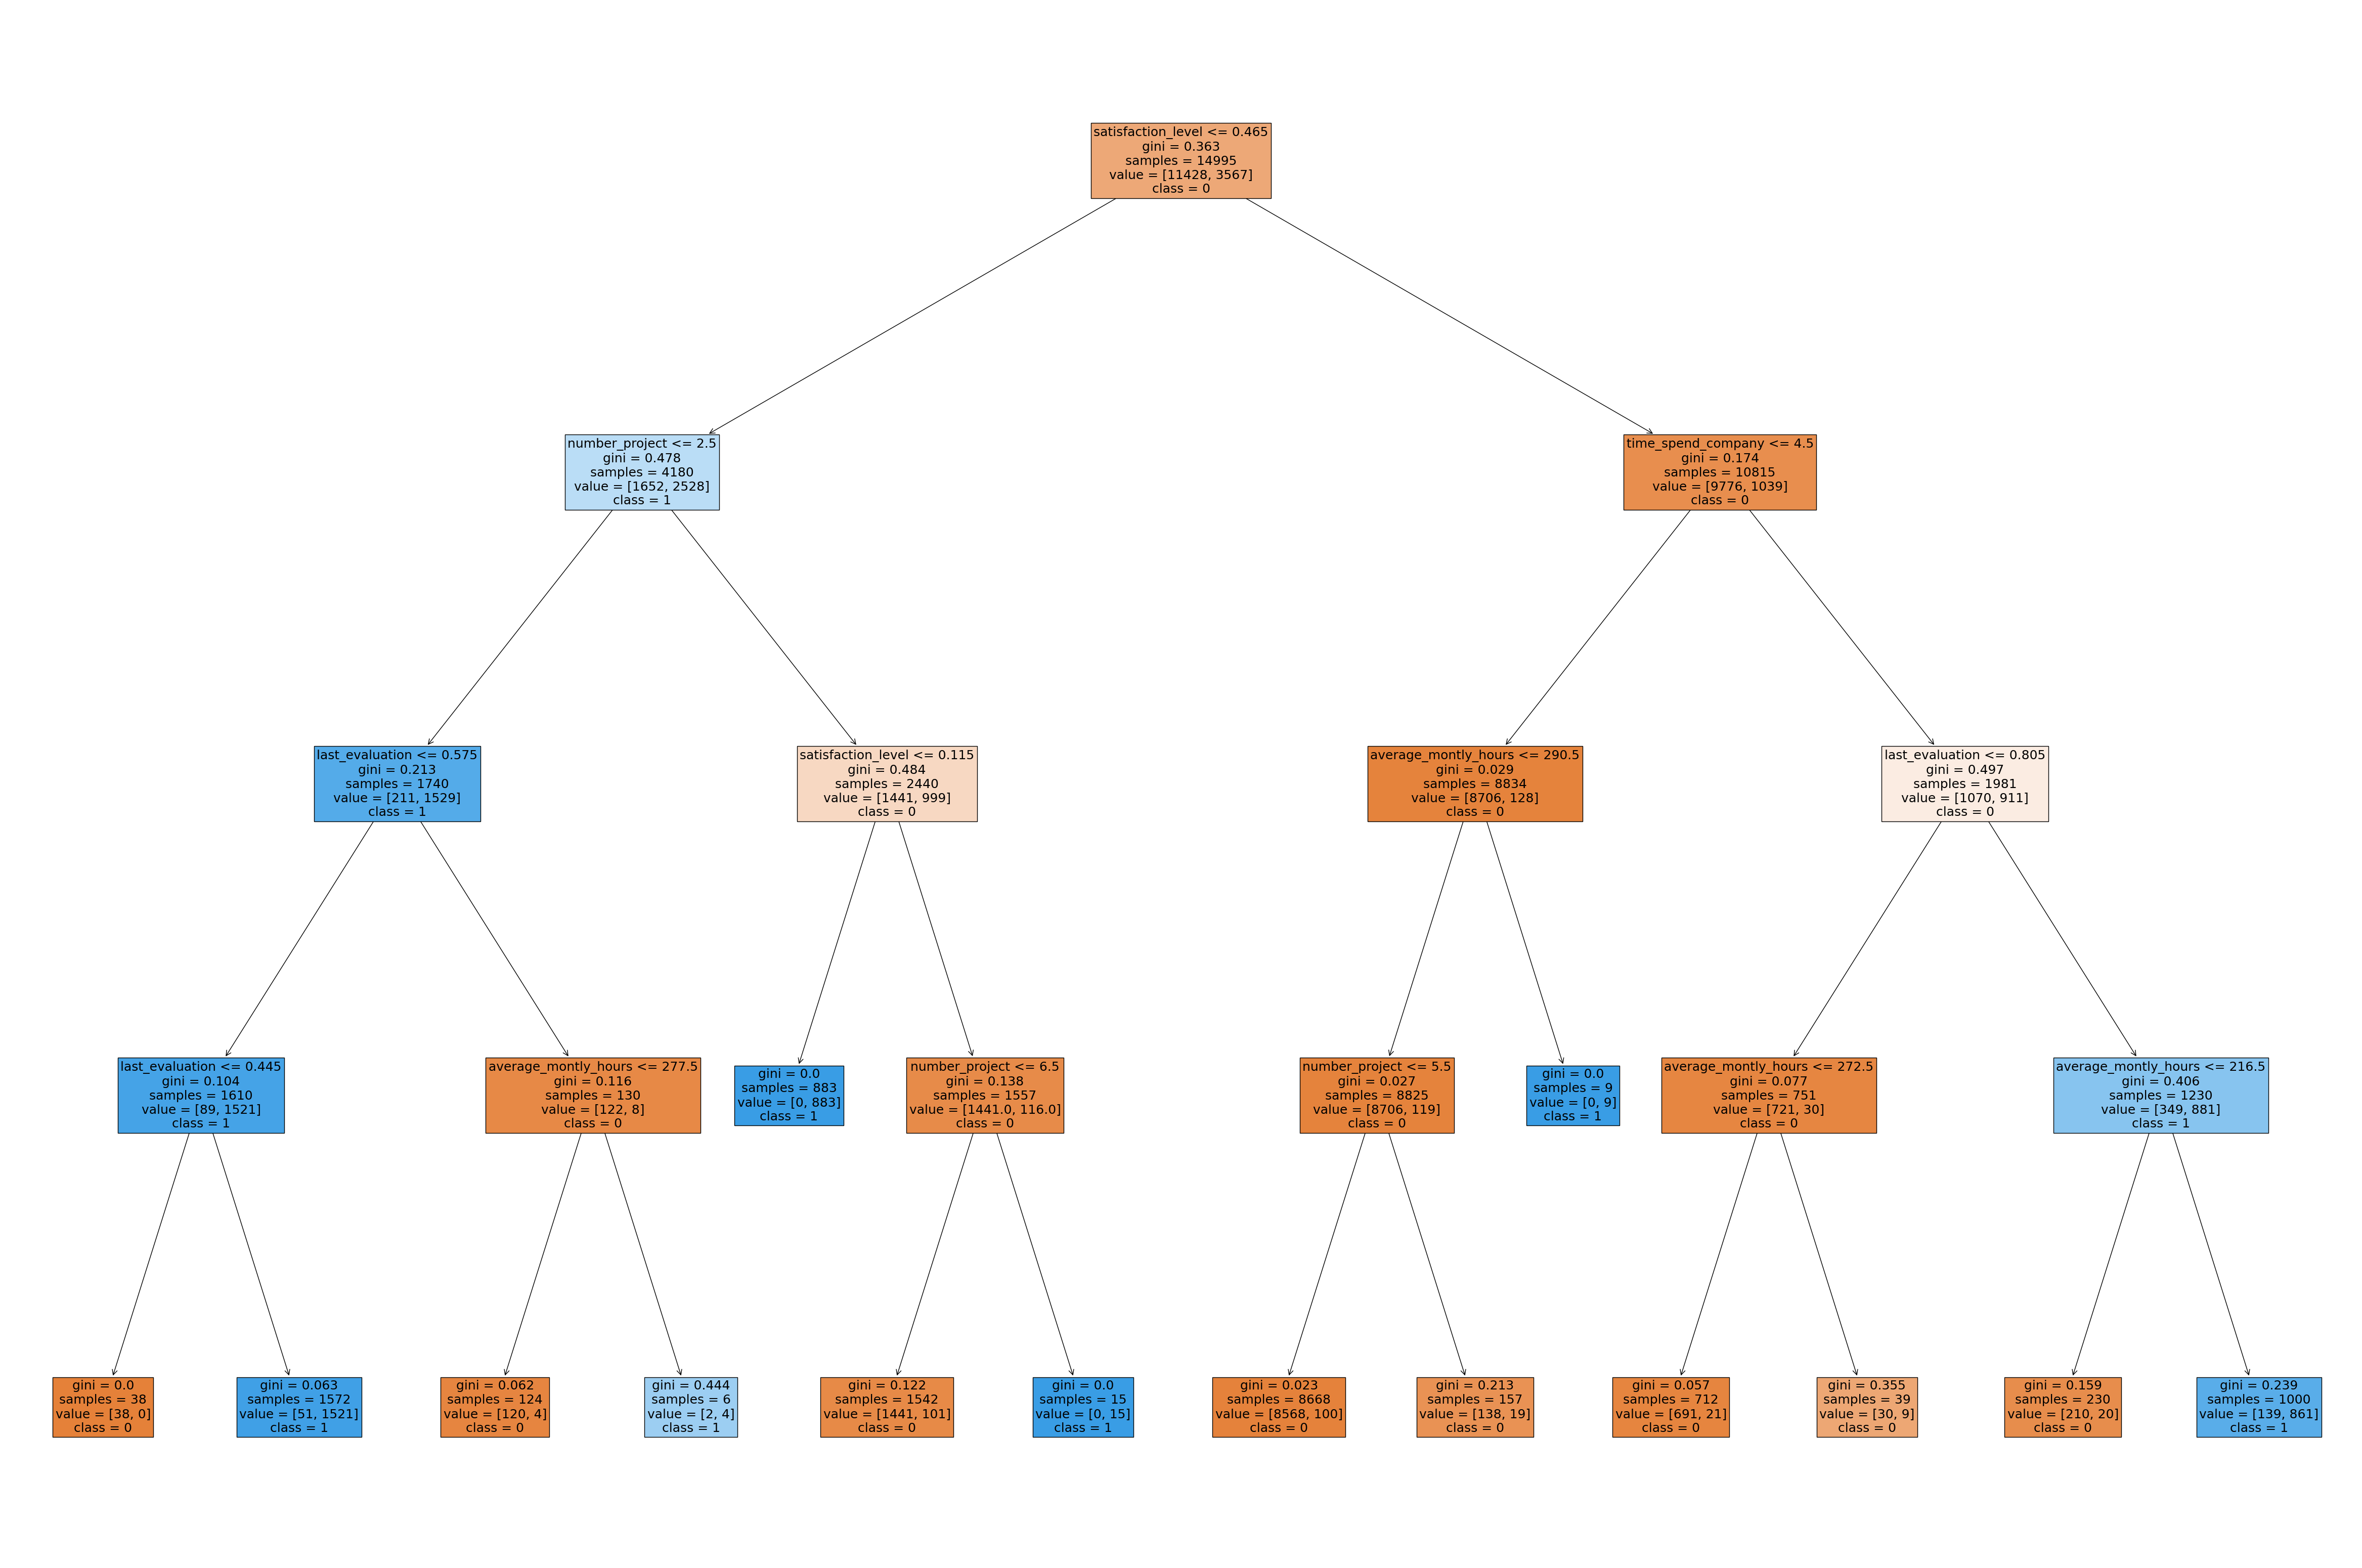

In [6]:
best_tree = gcv.best_estimator_


plt.figure(figsize=(60,40))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=['0', '1'],
               filled=True,fontsize=18)
plt.show() 

In [7]:
X_test = pd.read_csv(r"..\Cases\human-resources-analytics\tst_hr.csv")
dum_tst_hr = ct.transform(X_test)
# best_tree.predict(dum_tst_hr)

In [11]:
dum_tst_hr.shape

(15, 18)

In [8]:
print( best_tree.predict(dum_tst_hr))

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
print(best_tree.predict_proba(dum_tst_hr))

[[0.         1.        ]
 [0.139      0.861     ]
 [0.03244275 0.96755725]
 [0.03244275 0.96755725]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]
 [0.93450065 0.06549935]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]
 [0.98846331 0.01153669]]
